# Integración numérica Montecarlo

**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="300px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada,
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración.

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

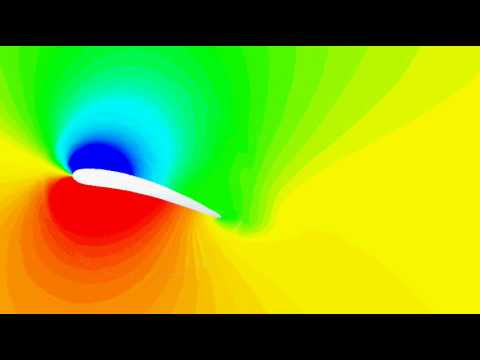

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

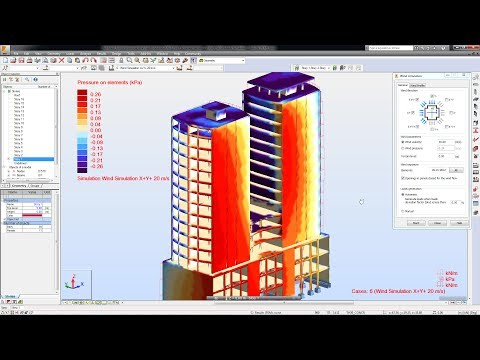

In [ ]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=(x-2)^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return (x-2)**2

Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}(x-2)^2\text{d}x.$$

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=(x-2)^2$ es exactamente el valor promedio de $f(x)=(x-2)^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}(u_i-2)^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

**¿Cómo construir vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [ ]:
def montecarlo1(f,N):
  u=np.random.rand(N) # 'N' número aleatorios entre (0,1) con distribución Uniforme
  y=f(u)
  return np.mean(y)

In [ ]:
montecarlo1(f,100)

2.428817189794966

En este caso, la integral se puede hacer fácilmente. Comparemos el resultado con el valor real:

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\left.\frac{(x-2)^3}{3}\right|_{x=0}^{x=1}=\frac{7}{3}$$

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [ ]:
import pandas as pd

In [ ]:
terminos=np.logspace(1,5,5)     # [10**1, 10**2, 10**3, 10**4, 10**5]
terminos=terminos.astype('int')
tablita=pd.DataFrame(index=terminos,columns=['integral','error'])

In [ ]:
tablita.loc[10000,'integral']=8 # Accedemos al elemento con index=10000 y columna='integral'
tablita

In [ ]:
tablita.iloc[3,0]=10            # Accedemos al elemento con posición en renglón=3 y columna=0
tablita

In [ ]:
tablita['integral']             # Accedemos a la columna 'integral'

In [ ]:
tablita.loc[10000]               # Accedemos al renglo con index=10000

In [ ]:
for n in terminos:
  tablita.loc[n,'integral']=montecarlo1(f,n)
tablita['error']=np.abs(7/3-tablita['integral'])
tablita

,integral,error
10,2.53489,0.201557
100,2.3862,0.052867
1000,2.35316,0.019827
10000,2.331658,0.001676
100000,2.332301,0.001032


Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i),$$

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i).$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return (x-2)**2

In [ ]:
x=np.linspace(0,1,100)
plt.plot(x,f(x))
u=np.random.rand(50) # 50 puntos para usar en la integración Montecarlo
plt.plot(u,f(u),'xr')
plt.grid()
print("El promedio de las x rojas es la aproximación de la integral entre 0 y 1. Promedio =",f(u).mean())

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [ ]:
def montecarlo1(f,a,b,N):
  u=np.random.uniform(a,b,N)
  return f(u).mean()*(b-a)

In [ ]:
montecarlo1(f,0,1,1000)

2.3196385970628723

**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

In [ ]:
import pandas as pd

In [ ]:
terminos=np.logspace(1,5,5) # [10**1, 10**2, ..., 10**5]
terminos=terminos.astype('int') # Convertimos 'terminos' a enteros
tablita=pd.DataFrame(index=terminos,columns=['f1','f2','f3'])
tablita

In [ ]:
# Modificando una celda específica: (1000,f2)
tablita.loc[100,'f2']=0
tablita

---

In [ ]:
d_fcn={'f1':lambda x: np.exp(x**2),   # lambda  ->  define funciones sin nombre (volátiles)
       'f2':lambda x: 1/np.log10(x),
       'f3':lambda x: np.sin(x)/x}

In [ ]:
for N in terminos:
  for fN,f in d_fcn.items():          # items  ->  regresa el par (key,value) del diccionario. En este caso (Nombre,función)
    tablita.loc[N,fN]=montecarlo1(f,2,2.1,N)
tablita

,f1,f2,f3
10,6.920251,0.317359,0.044076
100,6.669462,0.32152,0.043229
1000,6.688252,0.320944,0.043323
10000,6.742772,0.320933,0.04327
100000,6.737451,0.320921,0.043283


___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

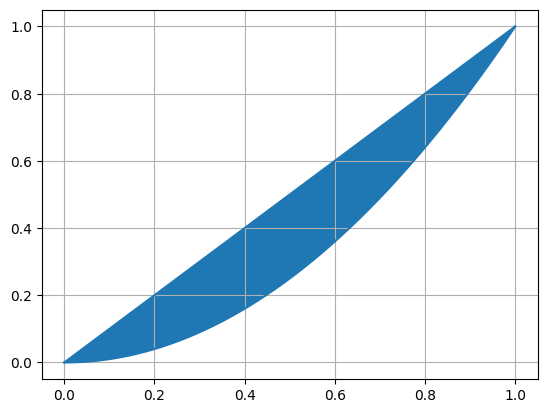

In [ ]:
def f1(x):
  return x
def f2(x):
  return x**2
x=np.linspace(0,1,1000)
plt.plot(x,f1(x))
plt.plot(x,f2(x),'C0')
plt.fill_between(x,f1(x),f2(x))
plt.grid()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

0.16694615447840266

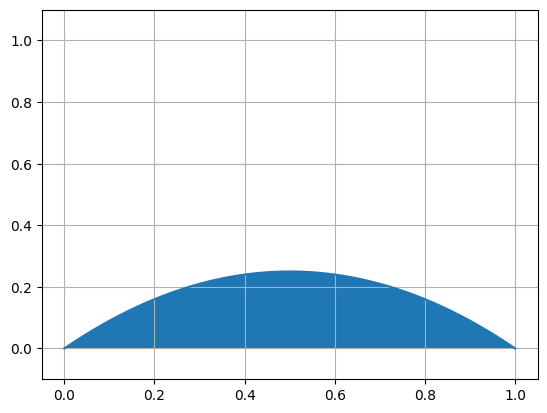

In [ ]:
def f(x):
  return f1(x)-f2(x)
N=10**5
plt.plot(x,f(x))
plt.fill_between(x,f(x))
plt.ylim([-0.1,1.1])
plt.grid()
montecarlo1(f,0,1,N)

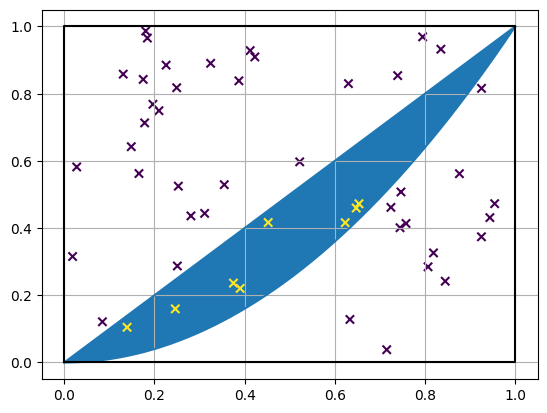

In [ ]:
def region(x,y):
  return (y<=f1(x))&(y>=f2(x))
ux=np.random.rand(50)
uy=np.random.rand(50)
plt.plot(x,f1(x))
plt.plot(x,f2(x),'C0')
plt.fill_between(x,f1(x),f2(x))
plt.plot([0,1,1,0,0],[0,0,1,1,0],'k') # Área conocida (AR)
plt.scatter(ux,uy,c=region(ux,uy),marker='x')
plt.grid()

In [ ]:
region(ux,uy).sum() # Puntos que están dentro de la región (AD)

8

In [ ]:
region(ux,uy).mean() # Relación entre los puntos que satisface y los puntos totales

0.16

In [ ]:
# El área (AD) es el producto entre el área conocida y la relación de puntos
xmax,xmin=1,0
ymax,ymin=1,0
AR=(xmax-xmin)*(ymax-ymin)
AR*region(ux,uy).mean()

0.16

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

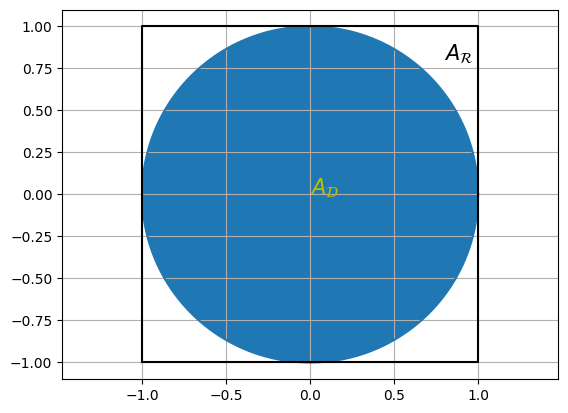

In [ ]:
def circuloP(x):
  r=1
  return np.sqrt(r**2-x**2)
def circuloN(x):
  r=1
  return -np.sqrt(r**2-x**2)

x=np.linspace(-1,1,1000)
plt.plot(x,circuloP(x))
plt.plot(x,circuloN(x),'C0')
plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1],'k')
plt.fill_between(x,circuloP(x),circuloN(x))
plt.text(0,0,'$A_\mathcal{D}$',fontsize=15,color='y')
plt.text(0.8,0.8,'$A_\mathcal{R}$',fontsize=15)
plt.axis('equal')
plt.grid()

Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

In [ ]:
N=10**5
ux=np.random.uniform(-1,1,N)
uy=np.random.uniform(-1,1,N)

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de $\theta$ se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

In [ ]:
def bernoulli_circulo(x,y):
  r=1
  return x**2+y**2<=r**2
B=bernoulli_circulo(ux,uy)
B.mean() # El 78.69% de los puntos está dentro del círculo

0.7869

In [ ]:
# Aproximación de pi con 10**5 puntos
AR=4 # base=2, altura=2
B.mean()*AR

3.1476

De nuevo, comparemos con el valor exacto.

In [ ]:
# Usamos desde N=10**1 hasta N=10**6
terminos=np.logspace(1,8,8).astype('int')
terminos

array([       10,       100,      1000,     10000,    100000,   1000000,
        10000000, 100000000])

In [ ]:
import pandas as pd

In [ ]:
pi_approx=pd.DataFrame(index=terminos,columns=['Aproximación','Error'])

Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [ ]:
def montecarlo2(region,xmax,xmin,ymax,ymin,N):
  ux=np.random.uniform(xmin,xmax,N)
  uy=np.random.uniform(ymin,ymax,N)
  B=region(ux,uy)
  AR=(xmax-xmin)*(ymax-ymin)
  return AR*B.mean()

In [ ]:
for N in terminos:
  pi_approx.loc[N,'Aproximación']=montecarlo2(bernoulli_circulo,1,-1,1,-1,N)
pi_approx['Error']=np.abs(np.pi-pi_approx['Aproximación'])
pi_approx

,Aproximación,Error
10,3.2,0.058407
100,3.0,0.141593
1000,3.14,0.001593
10000,3.14,0.001593
100000,3.14552,0.003927
1000000,3.142748,0.001155
10000000,3.141401,0.000192
100000000,3.141507,0.000085


In [ ]:
plt.loglog(terminos,1/np.sqrt(terminos))
plt.xlabel('Cantidad de términos (N)')
plt.ylabel('Exactitud')
plt.grid()

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación e incluir el error relativo (usar 10, 100, 1000, 10000 y 100000 términos).

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
def montecarlo2(region,xmax,xmin,ymax,ymin,N):
  ux=np.random.uniform(xmin,xmax,N)
  uy=np.random.uniform(ymin,ymax,N)
  B=region(ux,uy)
  AR=(xmax-xmin)*(ymax-ymin)
  e_rel=np.sqrt((1-B.mean())/(B.mean()*N))
  return AR*B.mean(),e_rel

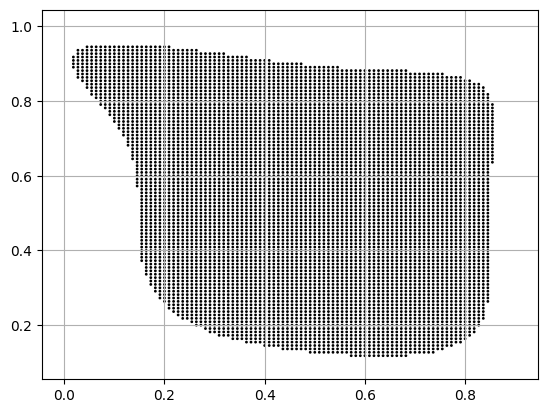

In [49]:
def region(x,y):
  return 4*(2*x-1)**4+8*(2*y-1)**8<1+2*(2*y-1)**3*(3*x-2)**2

xmin,xmax=0,0.9     # 0,1    # -0.1,2 # -10,10
ymin,ymax=0.1,1     # 0,2    # -10,10
x=np.linspace(xmin,xmax,100)
y=np.linspace(ymin,ymax,100)
X,Y=np.meshgrid(x,y)
plt.scatter(X,Y,c=region(X,Y),s=1,cmap='Greys')
plt.grid()

In [51]:
terminos=np.logspace(1,5,5).astype('int')
tabla=pd.DataFrame(index=terminos,columns=['Integral','Error'])
for N in terminos:
  tabla.loc[N]=montecarlo2(region,xmax,xmin,ymax,ymin,N)
tabla

,Integral,Error
10,0.648,0.158114
100,0.6075,0.057735
1000,0.5589,0.021196
10000,0.542052,0.007031
100000,0.545057,0.002205


___
## Error de aproximación de integrales por montecarlo
Ver [documento mit](https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf), página 5.